<a href="https://colab.research.google.com/github/Raspberry765/Smart_Frige_Raspi/blob/master/130_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/input/jh_heights_weights.csv')
X = df[['height','weight']]
y = df['y']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: y, Length: 200, dtype: int64


In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
lr = LogisticRegression(C=1000, random_state=0, solver='liblinear')

In [5]:
lr.fit(X,y)

LogisticRegression(C=1000, random_state=0, solver='liblinear')

In [6]:
lr.predict([
            (170,50),
            (175,60),
            (165,70),
])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1, 1, 0])

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_regions(clf, X, y):
    """ モデルが学習した領域をプロット """
    X, y = X.to_numpy(), y.to_numpy()
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.3),
                           np.arange(x2_min, x2_max, 0.3))

    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


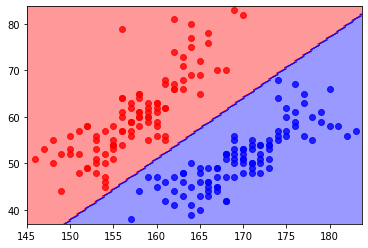

In [8]:
plot_regions(lr,X,y)